In [2]:
import tkinter as tk
from tkinter import filedialog
import os
import pydicom
import matplotlib.pyplot as plt
import numpy as np
import SimpleITK as sitk

Name: 1.3.46.670589.11.20322.5.0.13432.2022033117111082000-501-1-1u38fdw.dcm


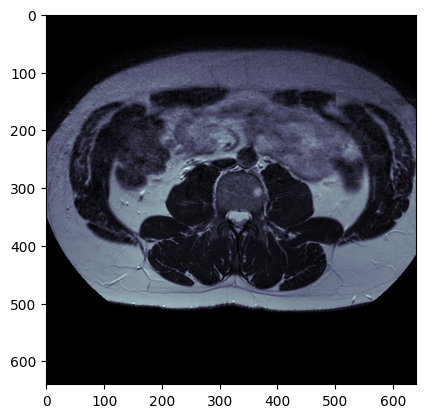

Name: 1.3.46.670589.11.20322.5.0.13432.2022033117111082000-501-10-1vzb330.dcm


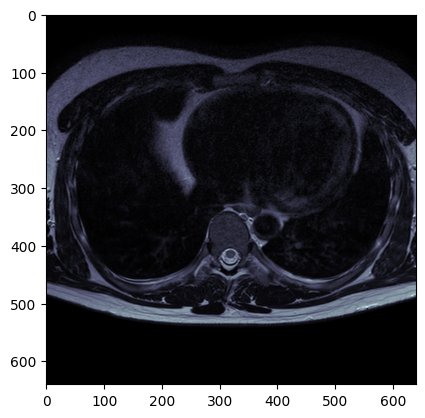

Name: 1.3.46.670589.11.20322.5.0.13432.2022033117111082000-501-11-1uzoaex.dcm


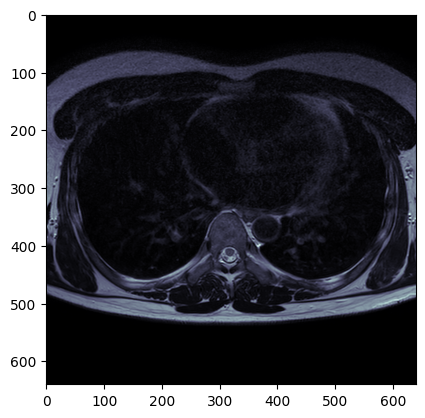

Name: 1.3.46.670589.11.20322.5.0.13432.2022033117111082000-501-12-1w0xtvl.dcm


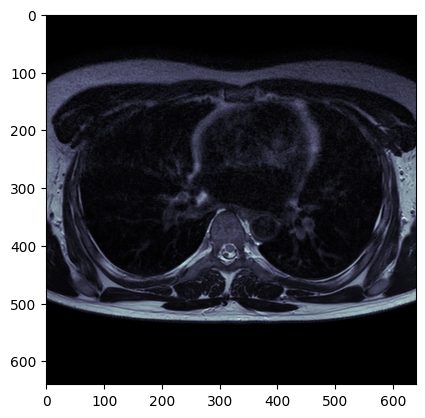

Name: 1.3.46.670589.11.20322.5.0.13432.2022033117111082000-501-13-1v1qzvp.dcm


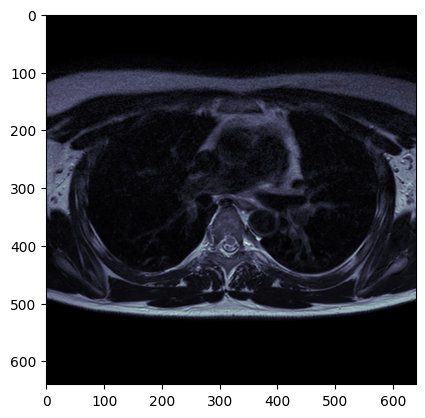

Name: 1.3.46.670589.11.20322.5.0.13432.2022033117111082000-501-14-1we831x.dcm


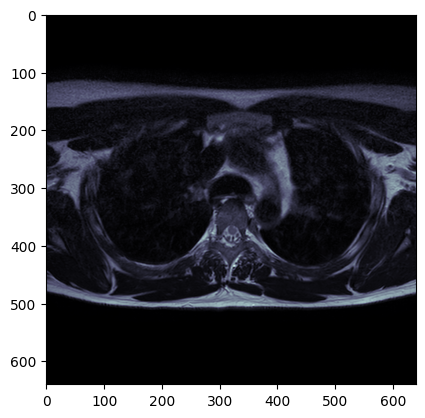

Name: 1.3.46.670589.11.20322.5.0.13432.2022033117111082000-501-15-1v3ednt.dcm


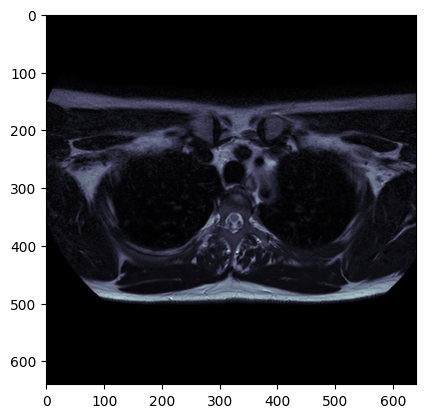

Name: 1.3.46.670589.11.20322.5.0.13432.2022033117111082000-501-2-1vgm2w1.dcm


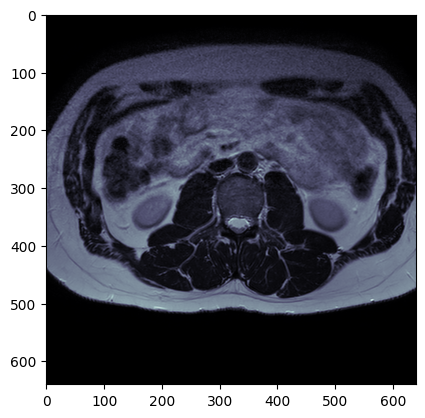

Name: 1.3.46.670589.11.20322.5.0.13432.2022033117111082000-501-3-1u5d1tu.dcm


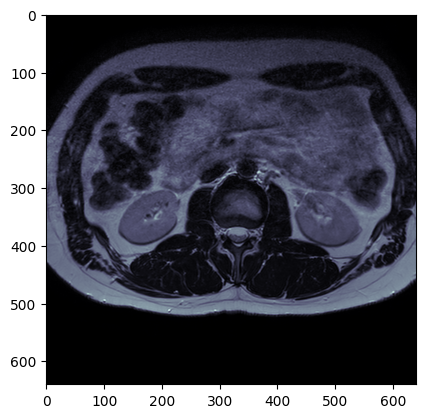

Name: 1.3.46.670589.11.20322.5.0.13432.2022033117111082000-501-4-1vidalb.dcm


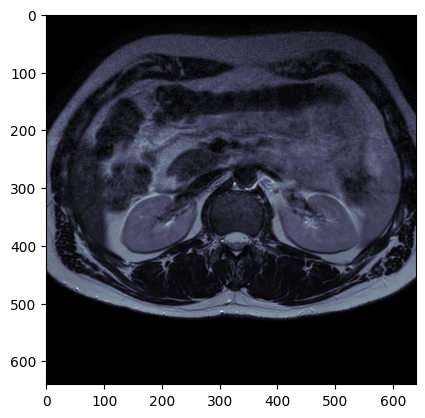

Name: 1.3.46.670589.11.20322.5.0.13432.2022033117111082000-501-5-1uj1cps.dcm


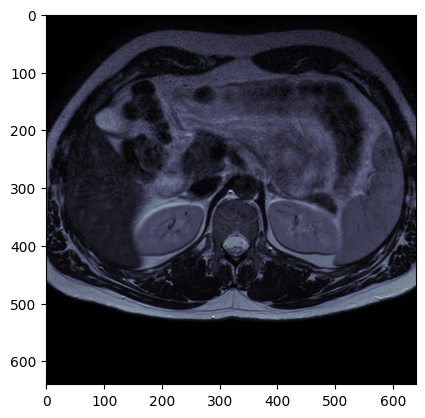

Name: 1.3.46.670589.11.20322.5.0.13432.2022033117111082000-501-6-1vkg023.dcm


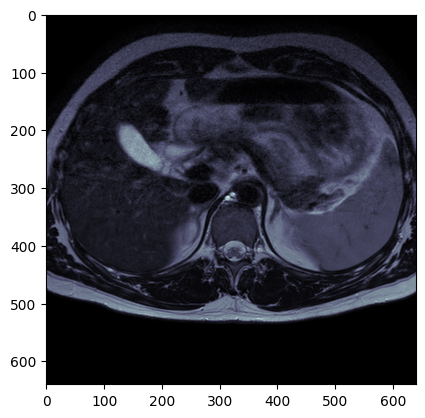

Name: 1.3.46.670589.11.20322.5.0.13432.2022033117111082000-501-7-1ukrag0.dcm


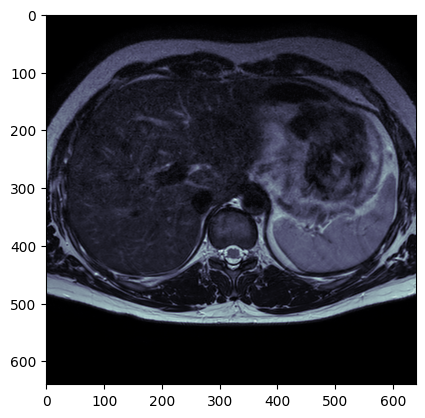

Name: 1.3.46.670589.11.20322.5.0.13432.2022033117111082000-501-8-1vxmfbu.dcm


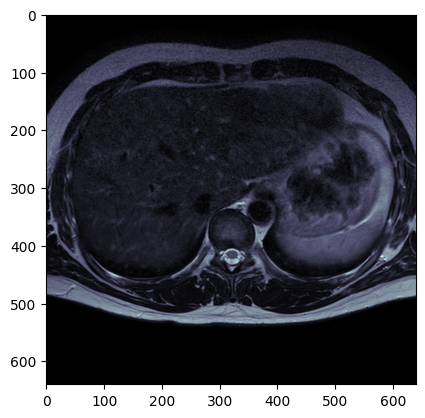

Name: 1.3.46.670589.11.20322.5.0.13432.2022033117111082000-501-9-1umgl6p.dcm


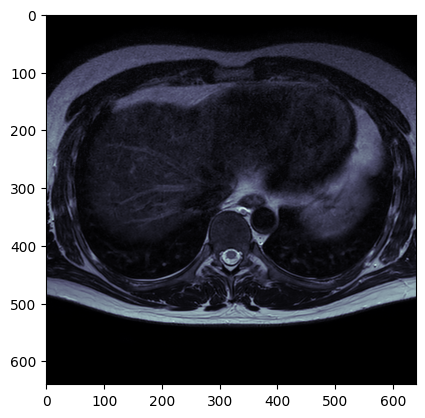

In [3]:
root = tk.Tk()
root.withdraw()

PathAux = filedialog.askdirectory(title="DICOM Images")
#Dcm_ROI = pydicom.dcmread(file_name)
#Dcm_im_ROI = np.copy(Dcm_ROI.pixel_array)
    
Dcm_im_all = []

for root,dirs,files in os.walk(PathAux):
    for i in files:
        if i.endswith(".dcm"):
            file_name=os.path.join(root,i)                  #Lee path de cada imagen
            Dcm = pydicom.dcmread(file_name)
            Dcm_im = np.copy(Dcm.pixel_array)
            Dcm_im_all.append(Dcm_im)
        print('Name:',i)
        plt.imshow(Dcm_im, cmap = plt.cm.bone)
        plt.show()

1140


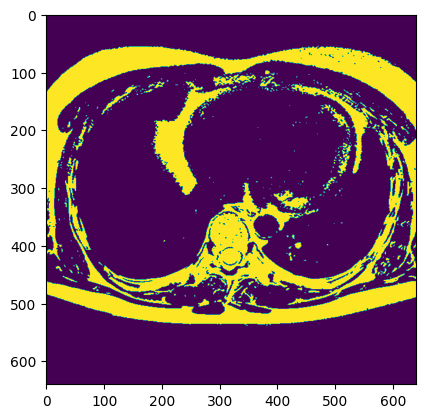

In [6]:
print(Dcm_im_all[1].max())
image = sitk.GetImageFromArray(Dcm_im_all[1])
# Assuming 'image' is your SimpleITK image
#otsu_filter = sitk.OtsuThresholdImageFilter()

# # Get the calculated threshold value
# threshold_value = otsu_filter

# # Apply the threshold to get the binary image
binary_image = image > 150

# Set the input image

# Optionally, specify the number of bins for the histogram (default is 128)
#otsu_filter.SetNumberOfHistogramBins(256)

# Optionally, specify the number of classes for Otsu thresholding (default is 1)
#otsu_filter.SetNumberOfThresholds(1)

# Execute the filter
#binary_image = otsu_filter.Execute(image)

# Display the original and binary images for visualization
#sitk.Show(sitk.LabelOverlay(image, binary_image), title="Otsu Thresholding")

imagefinal = sitk.GetArrayFromImage(binary_image)

plt.imshow(imagefinal)
plt.show()

#sitk.Show(bin_image, title="Binary Image", backend="matplotlib")

# image_viewer = sitk.ImageViewer()
# image_viewer.SetTitle("grid using ImageViewer class")
# image_viewer.Execute(bin_image)


In [7]:
# Assuming 'binary_image' is your SimpleITK binary image
binary_erode_filter = sitk.BinaryErodeImageFilter()

# Set the input binary image
#binary_erode_filter.SetInput(binary_image)

# Optionally, specify the radius of the structuring element (default is 1)
binary_erode_filter.SetKernelRadius(2)

# Optionally, specify the number of iterations (default is 1)
binary_erode_filter.SetNumberOfThreads(1)

# Execute the filter
eroded_binary_image = binary_erode_filter.Execute(binary_image)

# Display the original and eroded binary images for visualization
#sitk.Show(sitk.LabelOverlay(binary_image, eroded_binary_image), title="Binary Erosion")

In [8]:
pad_size = [10, 10, 0] 
# Especifica el valor que deseas asignar a los píxeles agregados
pad_value = sitk.GetArrayFromImage(eroded_binary_image).max()
pad_value = np.double(pad_value)

# Aplica el relleno constante a la imagen
padded_image = sitk.ConstantPad(image, pad_size, pad_size, pad_value)

# Muestra la imagen original y la imagen ampliada para visualización
#sitk.Show([image, padded_image], title=["Imagen Original", "Imagen Ampliada"])

In [11]:
print(pad_value)

1.0


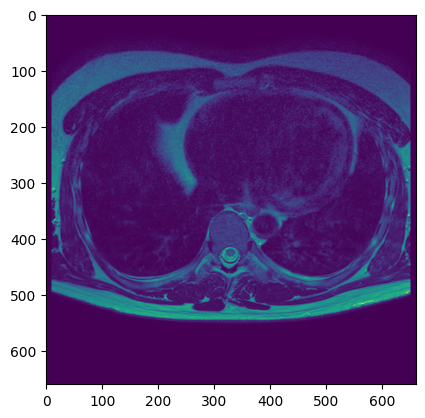

In [9]:
paddd = sitk.GetArrayFromImage(padded_image)

plt.imshow(paddd)
plt.show()

In [99]:
#binary_image = sitk.Image(Dcm_im_all[1])
#binary_image[20:50, 25:125] = 1
#binary_image[70:95, 40:60] = 1
#binary_image[70:95, 80:140] = 1

component_image = sitk.ConnectedComponent(padded_image)
sorted_component_image = sitk.RelabelComponent(component_image, sortByObjectSize=True)
largest_component_binary_image = sorted_component_image == 1
largest_component_binary_image = sitk.Not(largest_component_binary_image)
# Ensure both images have the same pixel type (e.g., 16-bit unsigned integer)
common_pixel_type = sitk.sitkUInt16

# Cast 'image2' to the common pixel type
#image2_cast = sitk.Cast(largest_component_binary_image, common_pixel_type)
onefatlessimage = sitk.Multiply(padded_image, largest_component_binary_image)

# component_image = sitk.ConnectedComponent(onefatlessimage)
# sorted_component_image = sitk.RelabelComponent(component_image, sortByObjectSize=True)
# largest_component_binary_image = sorted_component_image == 1
# largest_component_binary_image = sitk.Not(largest_component_binary_image)
# onefatlessimage = sitk.Multiply(onefatlessimage, largest_component_binary_image)


imagefinal = sitk.GetArrayFromImage(onefatlessimage)

plt.imshow(imagefinal)
plt.show()

RuntimeError: Exception thrown in SimpleITK Multiply: D:\a\1\sitk\Code\BasicFilters\src\sitkImageFilter.cxx:52:
sitk::ERROR: Input "image2" for "MultiplyImageFilter" has pixel type of "8-bit unsigned integer which does not match the primary input's pixel type of "16-bit unsigned integer!
The "image2" input may need casting to the "16-bit unsigned integer" pixel type.